## Big Mart Sales Dataset


In [437]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [438]:
train = pd.read_csv ('C:/Users/calca/Downloads/train_v9rqX0R.csv')

In [357]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

In [221]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Filling missing values

In [436]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

### Feature engineering

In [390]:
count_outlet = train.groupby('Outlet_Identifier')['Item_Identifier'].count()
train['count_outlet']= train['Outlet_Identifier'].map(count_outlet)

In [391]:
item_outlet = train.groupby('Item_Identifier')['Item_Identifier'].count()
train['item_outlet']= train['Item_Identifier'].map(item_outlet)

In [392]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({
    'Low Fat': 0,
    'LF': 0,
    'low fat': 0,
    'reg': 1,
    'Regular': 1
}).astype(str)

In [393]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Small': 0,'Medium':1,'High':2}).astype(str)

In [394]:
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.053, 0.18,0.33], labels=['Low Viz', 'Viz', 'High Viz'])


In [364]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].replace(np.nan, 'Outlier')


In [329]:
train['Item_Visibility_bins'].value_counts()

Viz         4095
Low Viz     3674
High Viz     228
Name: Item_Visibility_bins, dtype: int64

In [330]:
train['Item_Visibility_bins'].value_counts()

Viz         4095
Low Viz     3674
High Viz     228
Name: Item_Visibility_bins, dtype: int64

In [395]:
train['Item_Identifier'] = train['Item_Identifier'].apply(lambda x: x[0:2])

In [396]:
train['Outlet_Years'] = 2021 - train['Outlet_Establishment_Year']


In [233]:
# from datetime import date

# train['Outlet_Establishment_Year'] = pd.to_datetime(train['Outlet_Establishment_Year'].astype(str)).astype(str)

In [234]:
# from datetime import datetime
# def date_diff (end):
#     #end=end.strftime('%Y-%m-%d')
#     start = datetime.strptime('1985-01-01', "%Y-%m-%d")
#     end =   datetime.strptime(end, "%Y-%m-%d")
#     diff = end.date() - start.date()
#     return diff.days
# train['diff']=train['Outlet_Establishment_Year'].apply(lambda x: date_diff(x))

In [235]:
# diff=train.groupby('Item_Identifier')['diff'].diff()
#train['diff_items'] = train['Item_Identifier'].map(diff)

In [398]:
#train.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [58]:
train_cat = train.select_dtypes(include='object')
train_int = train.select_dtypes(include=['int64','float64'])


## Univariate Analysis
### Independent Variable (Categorical)

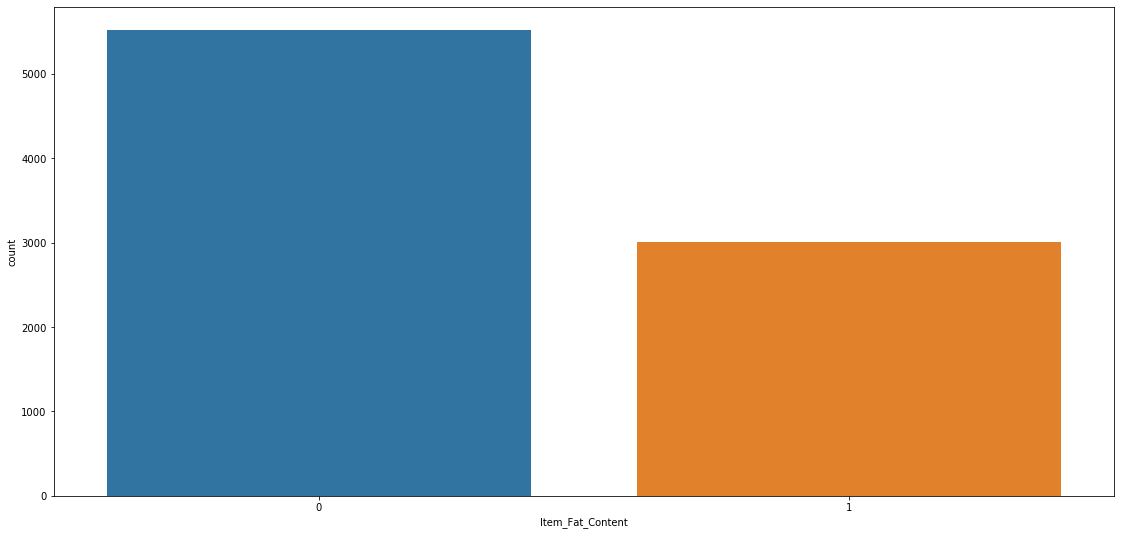

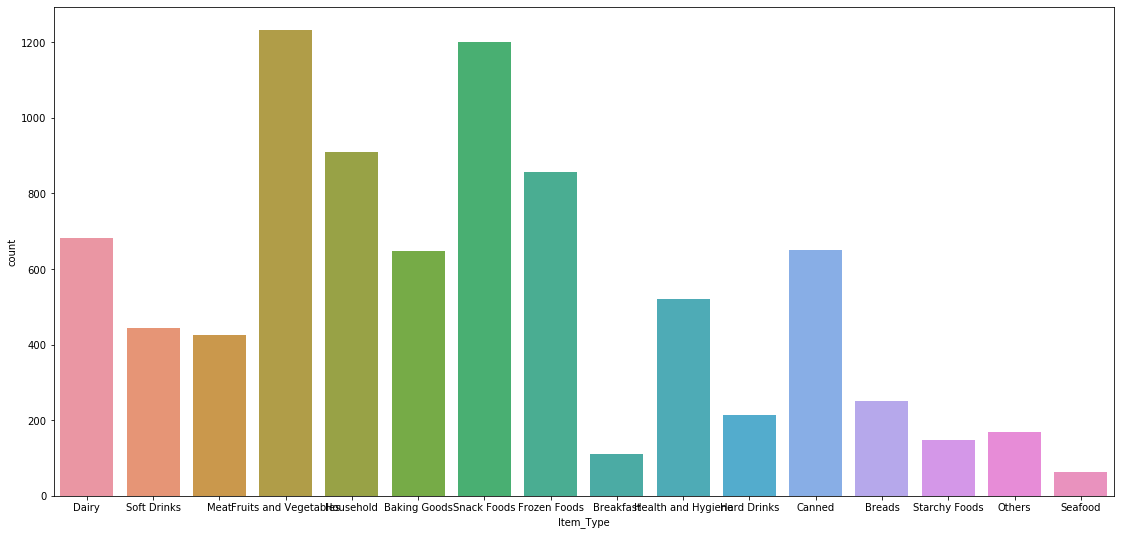

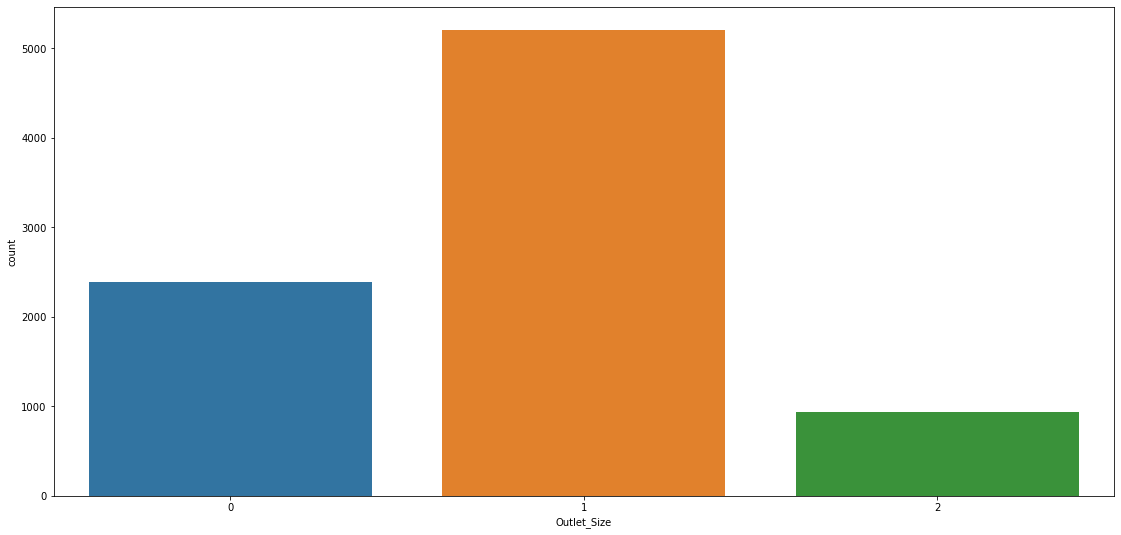

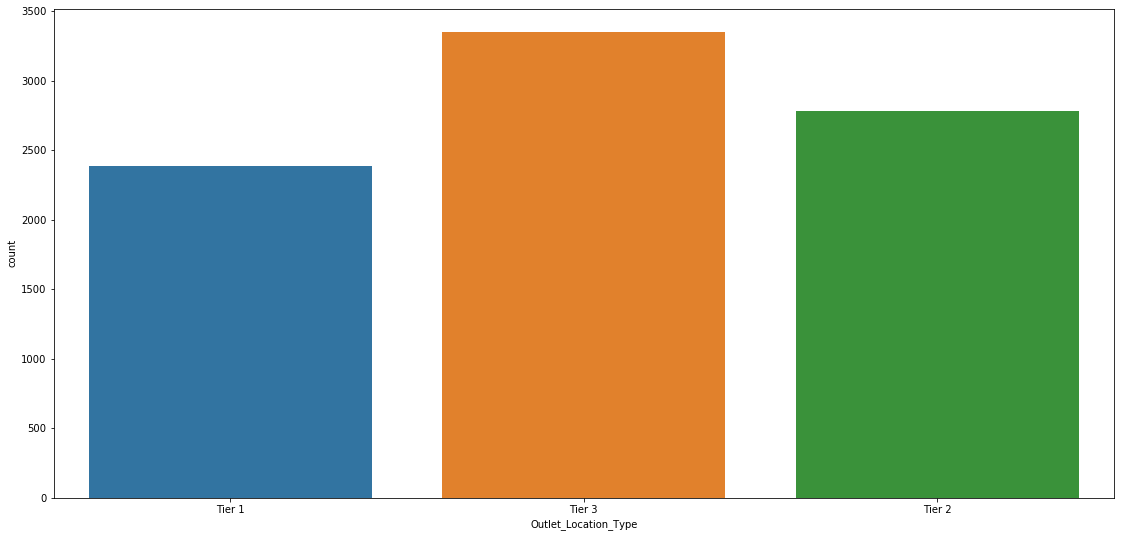

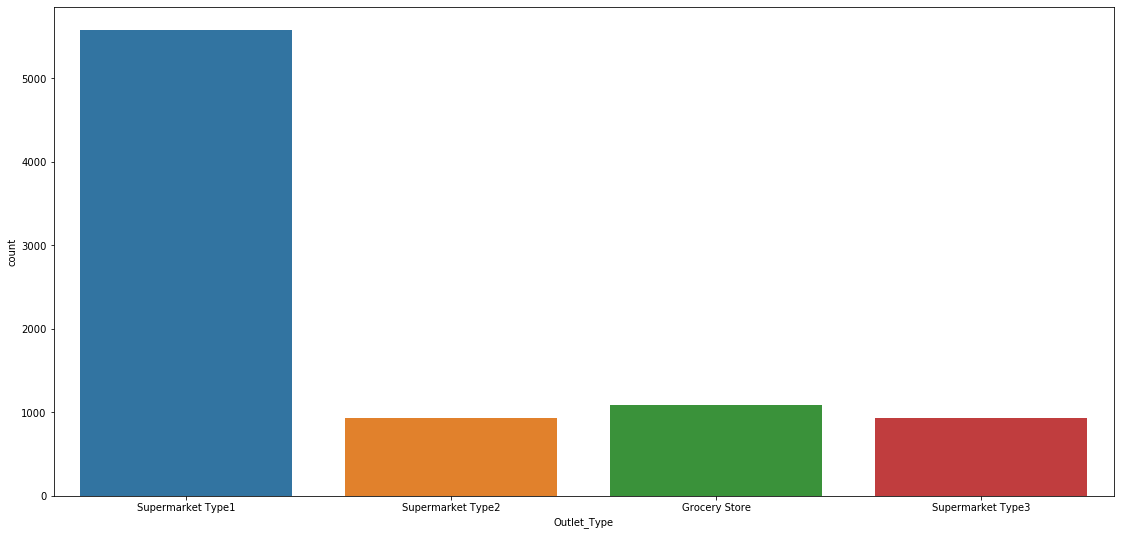

In [69]:
for i in train_cat:
    plt.figure(figsize=(19, 9))

    sns.countplot(train_cat[i])

    plt.show()

### Independent Variable (Numerical)
### BoxPlot distribution

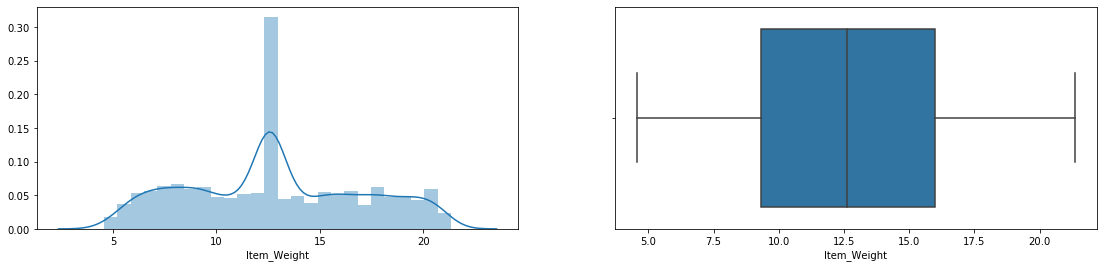

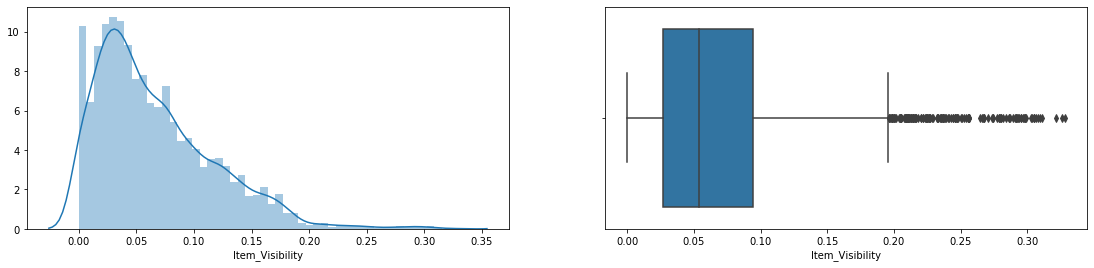

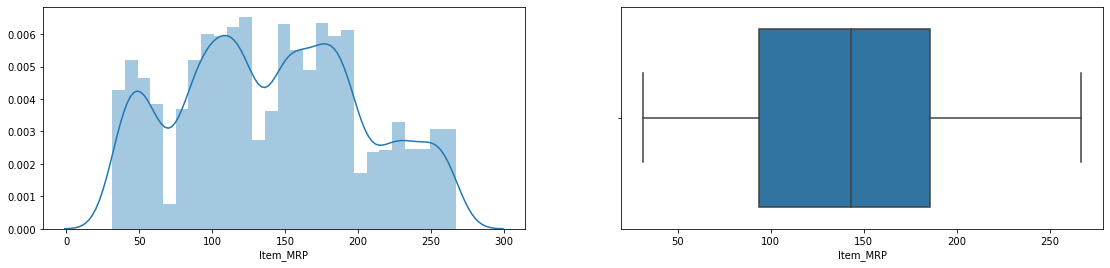

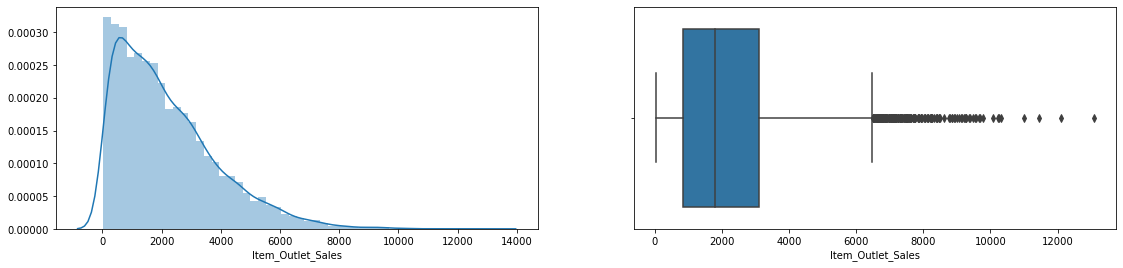

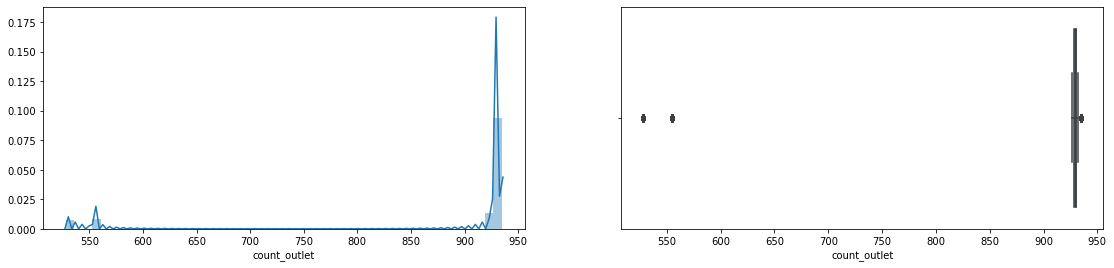

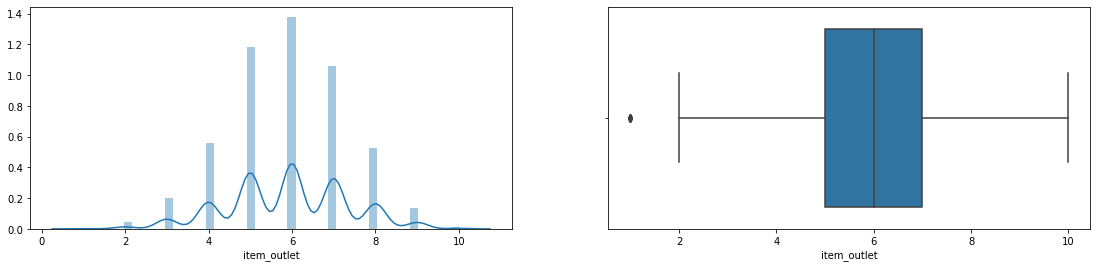

In [82]:
for i in train_int:
    plt.figure(figsize=(19,9))
    plt.subplot(2, 2, 1)
    sns.distplot(train_int[i])
    plt.subplot(2, 2, 2)
    sns.boxplot(train_int[i])
   
    plt.show()

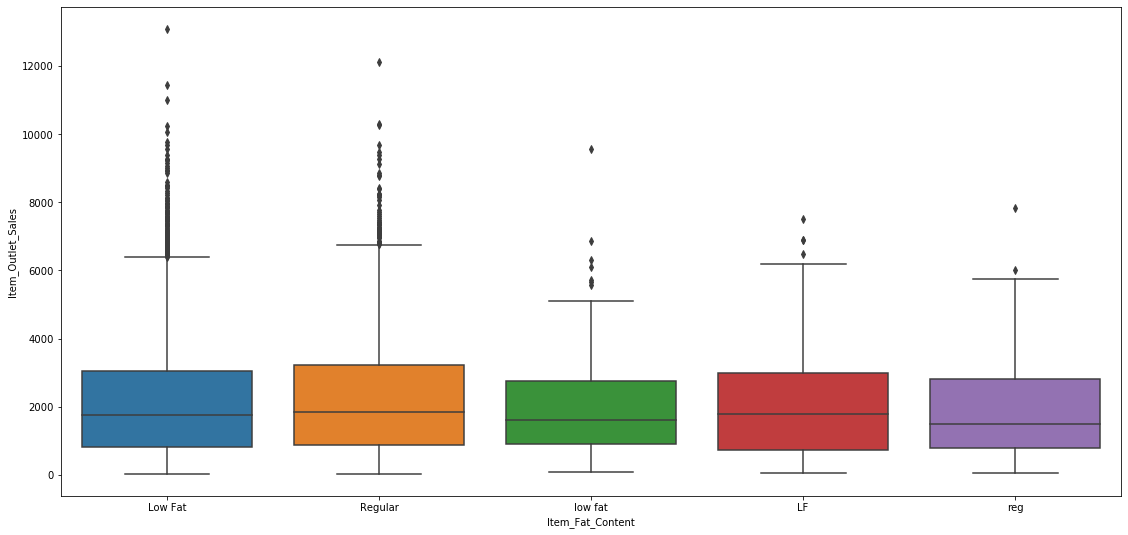

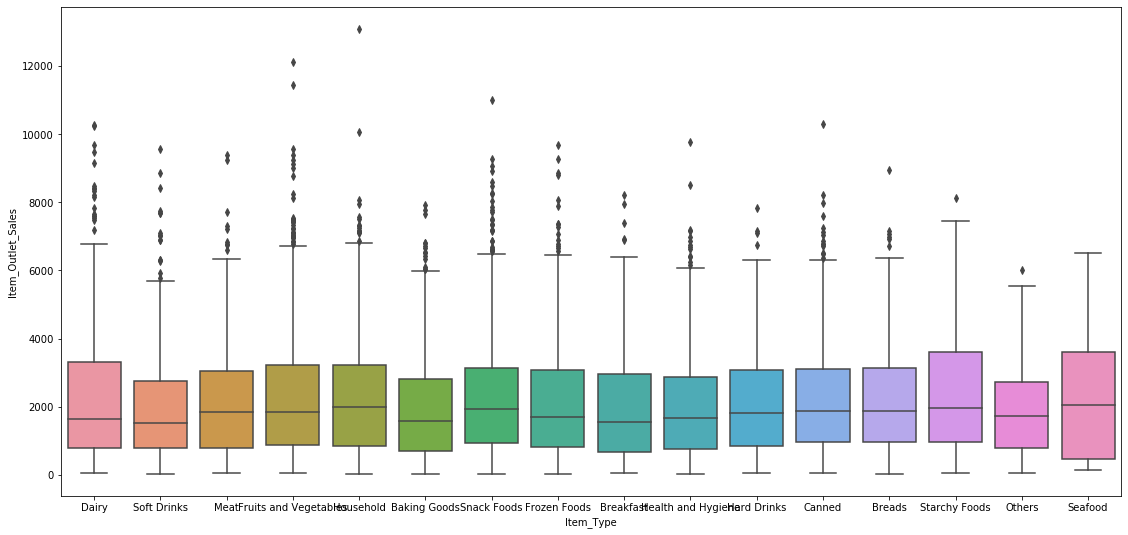

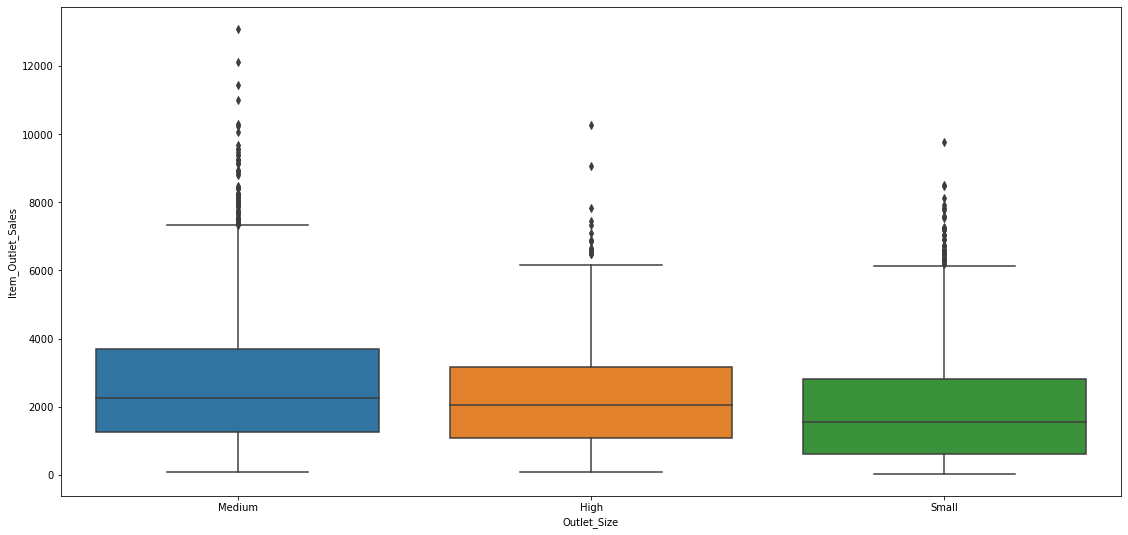

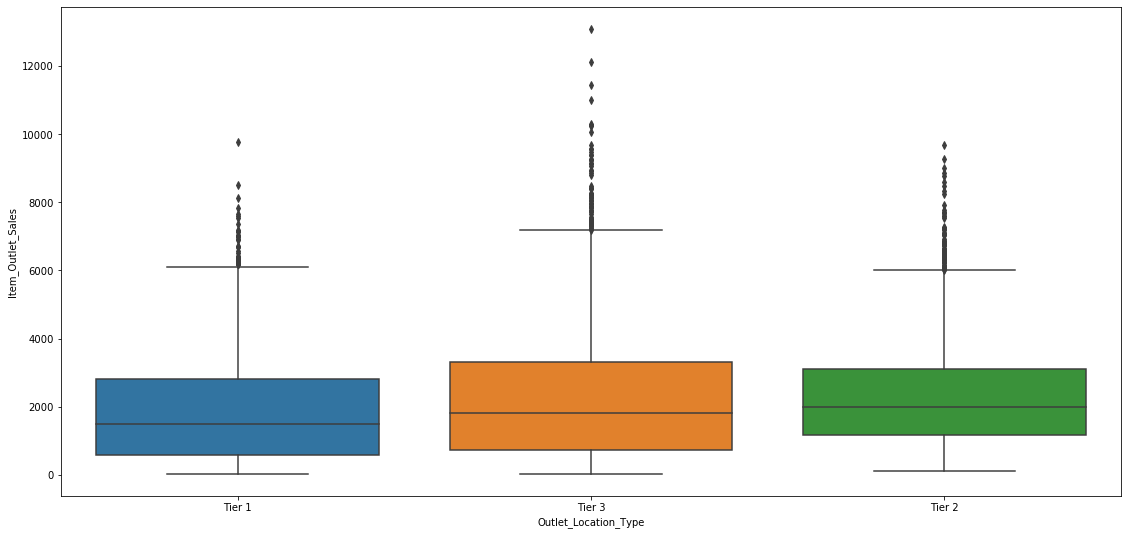

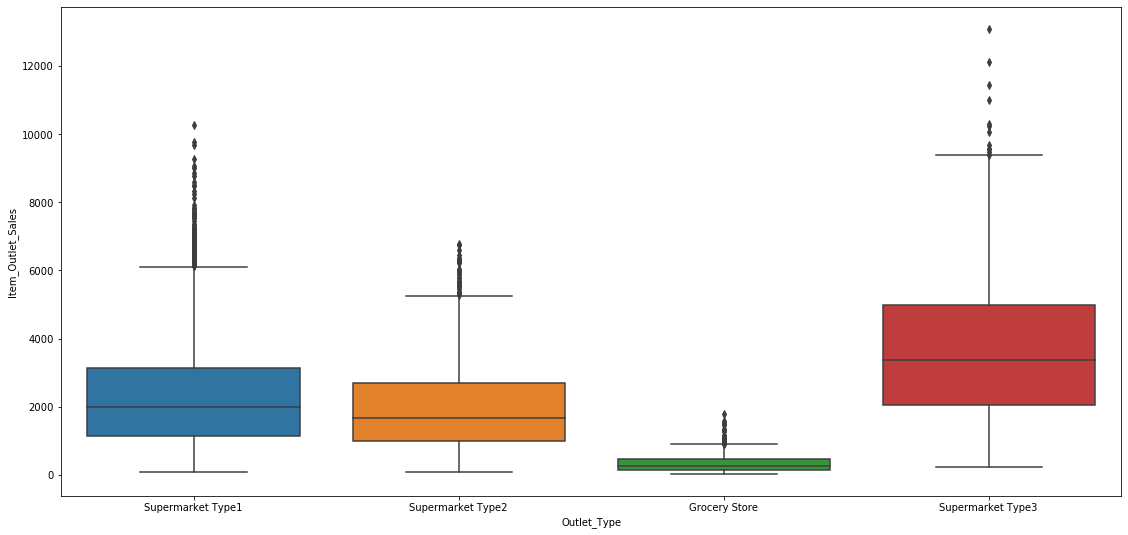

In [78]:
for i in train_cat:
    plt.figure(figsize=(19, 9))
    sns.boxplot(train[i],train['Item_Outlet_Sales']) 
    plt.show()

### Bivariate Analysis

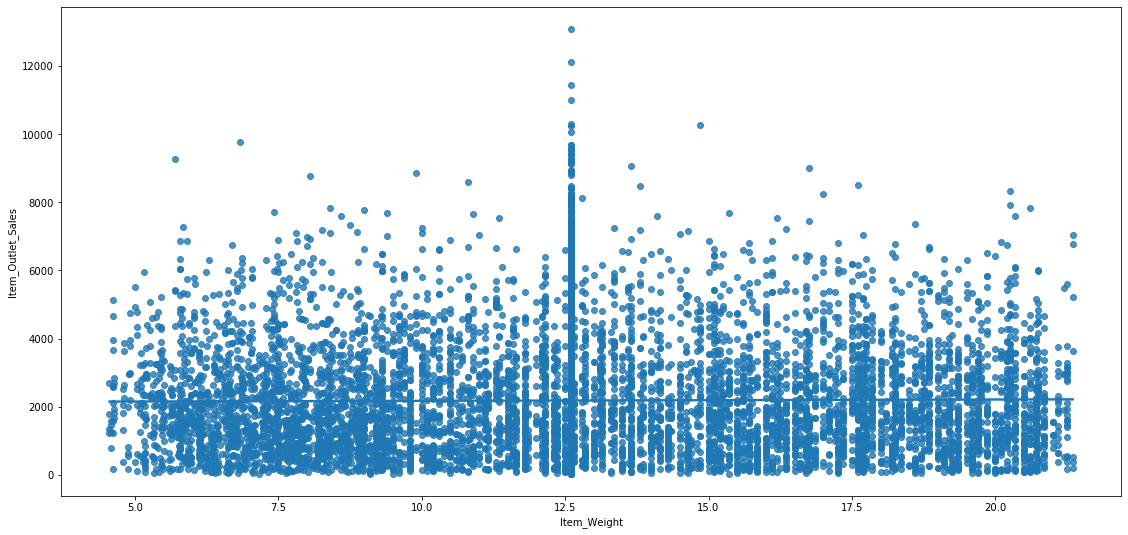

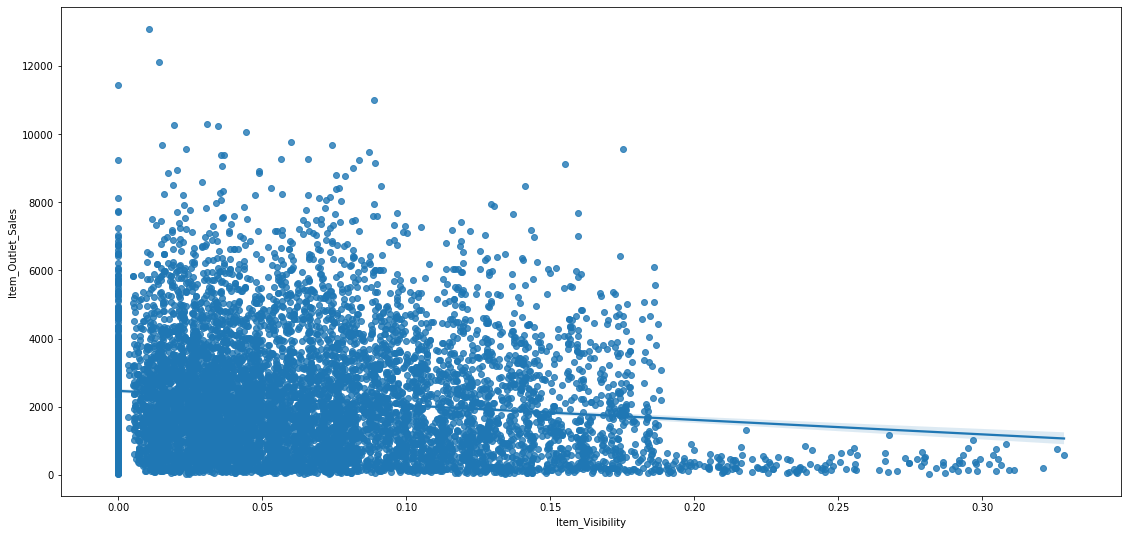

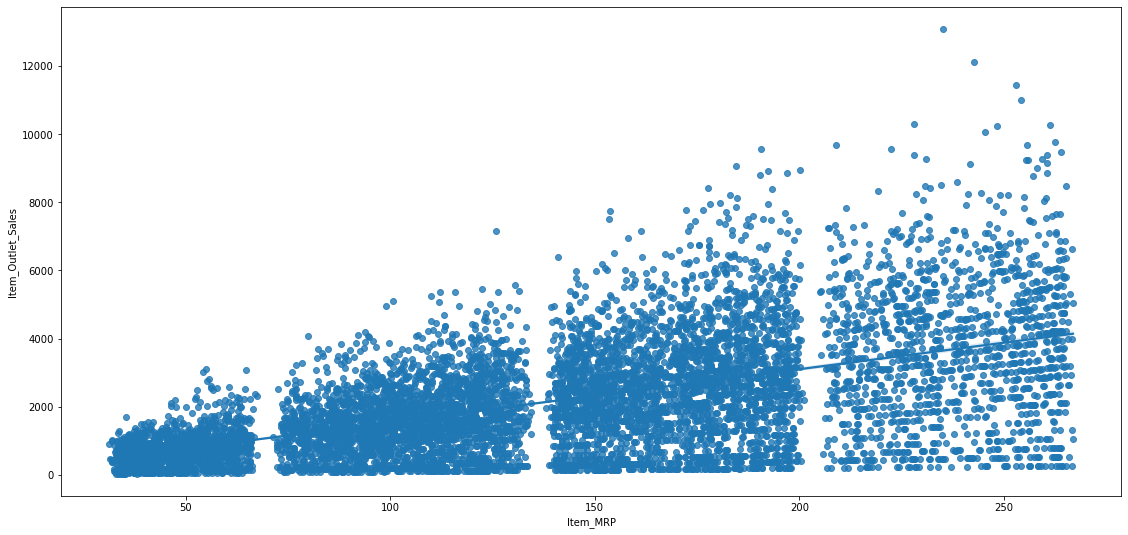

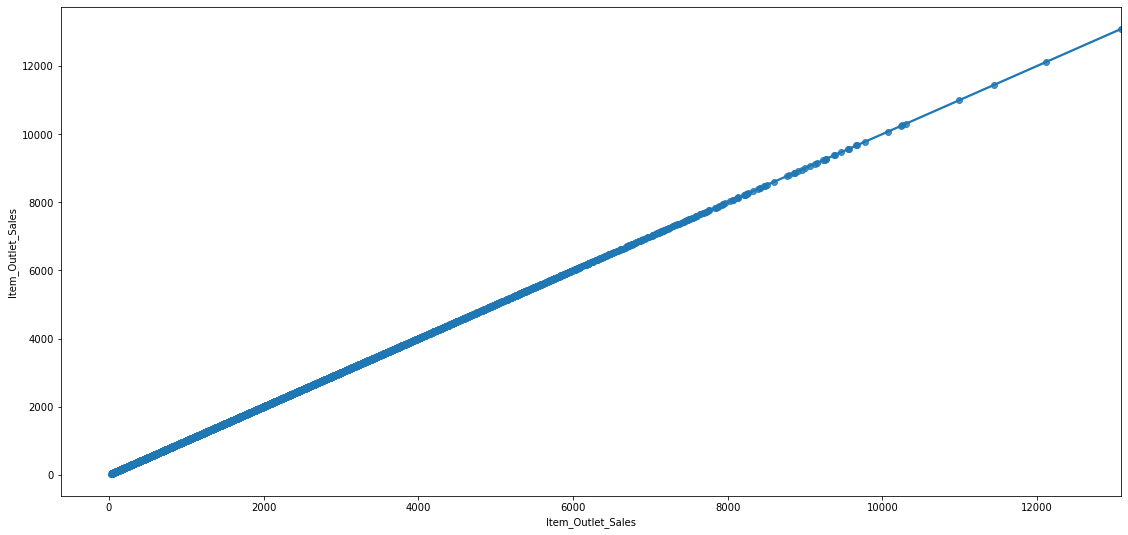

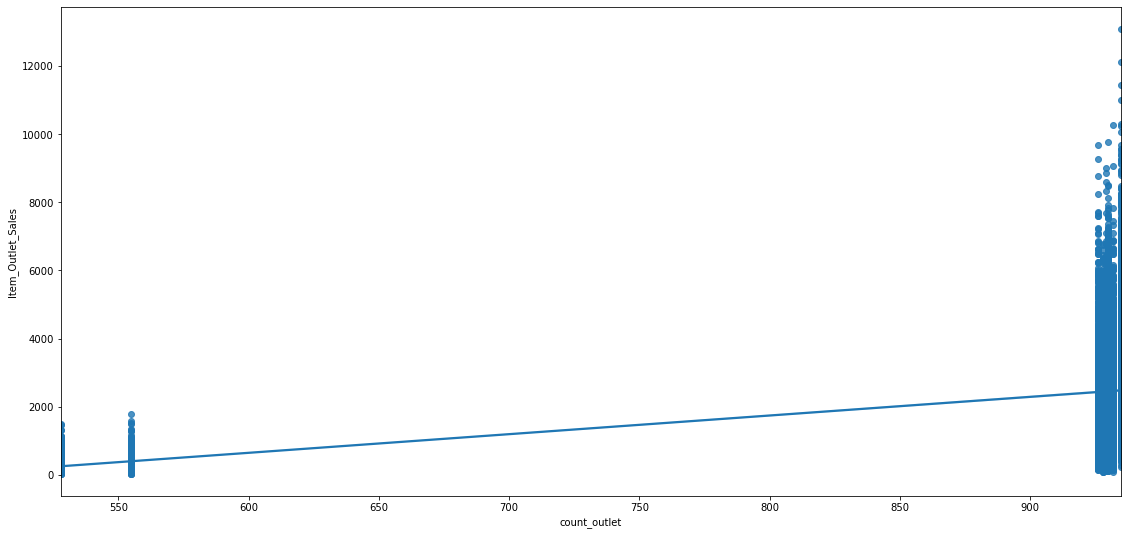

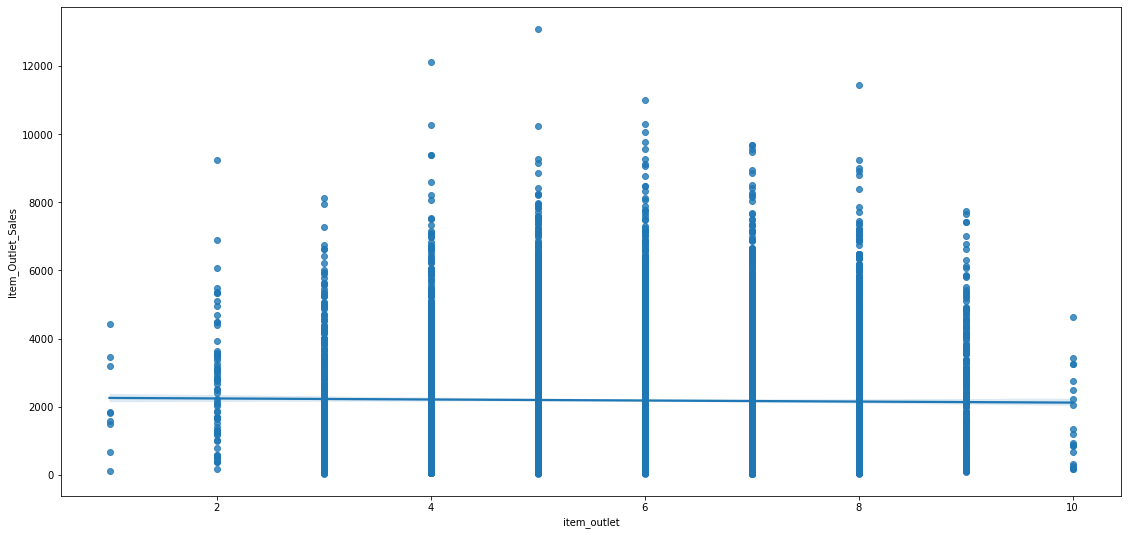

In [84]:
for feature in train_int:
    plt.figure(figsize = (19,9))
    sns.regplot(x=train_int[feature], y= train_int['Item_Outlet_Sales'])
    plt.show()

### Correlation check

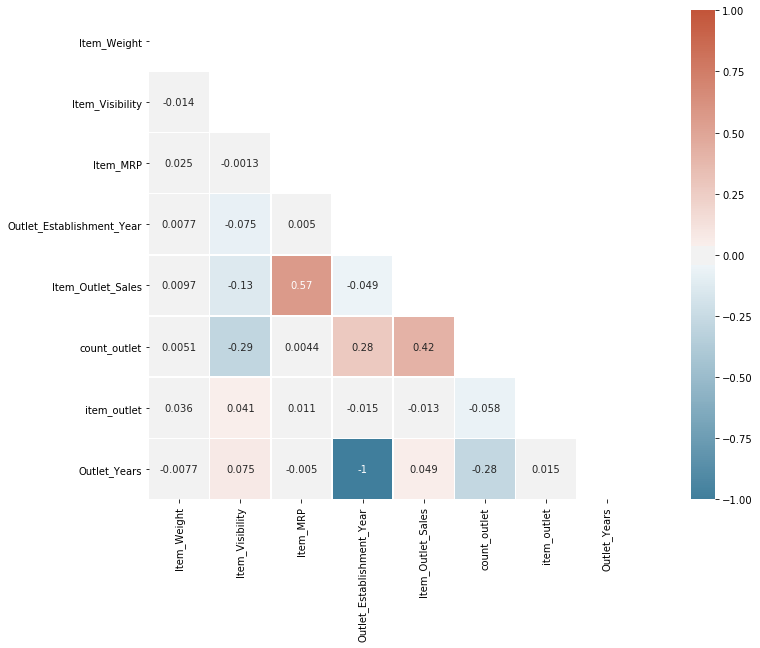

In [148]:
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(19,9))

sns.heatmap(train.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5,annot=True)

In [362]:
train_int.corrwith(train_int['Item_Outlet_Sales']).sort_values(ascending=False)


Item_Outlet_Sales    1.000000
Item_MRP             0.567574
count_outlet         0.415103
Item_Weight          0.009693
item_outlet         -0.012827
Item_Visibility     -0.128625
dtype: float64

# Model Building

In [399]:
one_hot=pd.get_dummies(train)

In [400]:
x = one_hot.drop('Item_Outlet_Sales', axis=1)
y = one_hot['Item_Outlet_Sales']


In [318]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,count_outlet,item_outlet,Outlet_Years,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_bins_Low Viz,Item_Visibility_bins_Viz,Item_Visibility_bins_High Viz
0,9.300,0.016047,249.8092,1999,930,8,22,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,928,6,12,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,1999,930,7,22,0,1,0,...,1,0,0,0,1,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,555,6,23,0,1,0,...,0,0,1,1,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,932,6,34,0,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,932,8,34,0,1,0,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,108.1570,2002,929,6,19,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,930,6,17,0,0,1,...,0,1,0,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,928,6,12,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [96]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=100)
# x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=88)

In [403]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [404]:
X_train_partition, X_val, y_train_partition, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

## XGBOOST

In [405]:
model = XGBRegressor(objective='reg:squarederror',
                     tree_method='gpu_hist',
                     missing=1,
                     seed=58,
                     learning_rate=0.002,
                     max_depth=7,
                     min_child_weight=8,
                     gamma=1,
                     subsample=0.85,
                     colsample_bytree=0.7,
                     reg_alpha=0.5,
                     reg_lambda=2,
                     eta=0.03,
                     n_estimators=15000)

In [406]:
model.fit(X_train_partition,
          y_train_partition,
          early_stopping_rounds=10,
          eval_metric='rmse',
          eval_set=[(X_train_partition, y_train_partition), (X_val, y_val)],
          verbose=True)

[0]	validation_0-rmse:2766.75952	validation_1-rmse:2714.48731
[1]	validation_0-rmse:2762.08887	validation_1-rmse:2709.86206
[2]	validation_0-rmse:2757.45581	validation_1-rmse:2705.27930
[3]	validation_0-rmse:2752.83228	validation_1-rmse:2700.72095
[4]	validation_0-rmse:2748.97192	validation_1-rmse:2696.94336
[5]	validation_0-rmse:2744.35107	validation_1-rmse:2692.39136
[6]	validation_0-rmse:2739.75220	validation_1-rmse:2687.82324
[7]	validation_0-rmse:2735.88379	validation_1-rmse:2684.04077
[8]	validation_0-rmse:2732.03809	validation_1-rmse:2680.26758
[9]	validation_0-rmse:2727.48926	validation_1-rmse:2675.75171
[10]	validation_0-rmse:2722.95557	validation_1-rmse:2671.31470
[11]	validation_0-rmse:2719.09448	validation_1-rmse:2667.56030
[12]	validation_0-rmse:2714.56470	validation_1-rmse:2663.07642
[13]	validation_0-rmse:2710.03345	validation_1-rmse:2658.62744
[14]	validation_0-rmse:2705.50830	validation_1-rmse:2654.17236
[15]	validation_0-rmse:2701.04907	validation_1-rmse:2649.74365
[1

[130]	validation_0-rmse:2266.66455	validation_1-rmse:2222.89526
[131]	validation_0-rmse:2263.18970	validation_1-rmse:2219.41577
[132]	validation_0-rmse:2260.33960	validation_1-rmse:2216.66309
[133]	validation_0-rmse:2256.87622	validation_1-rmse:2213.22998
[134]	validation_0-rmse:2253.41968	validation_1-rmse:2209.80200
[135]	validation_0-rmse:2249.98657	validation_1-rmse:2206.41577
[136]	validation_0-rmse:2247.16724	validation_1-rmse:2203.68457
[137]	validation_0-rmse:2244.33813	validation_1-rmse:2200.92554
[138]	validation_0-rmse:2241.54224	validation_1-rmse:2198.21313
[139]	validation_0-rmse:2238.74731	validation_1-rmse:2195.49512
[140]	validation_0-rmse:2235.93774	validation_1-rmse:2192.78516
[141]	validation_0-rmse:2233.15039	validation_1-rmse:2190.07715
[142]	validation_0-rmse:2229.76343	validation_1-rmse:2186.72095
[143]	validation_0-rmse:2226.94849	validation_1-rmse:2183.98706
[144]	validation_0-rmse:2223.58911	validation_1-rmse:2180.68164
[145]	validation_0-rmse:2220.19385	valid

[259]	validation_0-rmse:1901.88074	validation_1-rmse:1866.14319
[260]	validation_0-rmse:1899.83118	validation_1-rmse:1864.20337
[261]	validation_0-rmse:1897.26123	validation_1-rmse:1861.64136
[262]	validation_0-rmse:1894.69665	validation_1-rmse:1859.11487
[263]	validation_0-rmse:1892.12195	validation_1-rmse:1856.56677
[264]	validation_0-rmse:1889.56445	validation_1-rmse:1854.06543
[265]	validation_0-rmse:1887.04199	validation_1-rmse:1851.56787
[266]	validation_0-rmse:1884.47595	validation_1-rmse:1849.09583
[267]	validation_0-rmse:1882.44177	validation_1-rmse:1847.14087
[268]	validation_0-rmse:1880.41089	validation_1-rmse:1845.17493
[269]	validation_0-rmse:1878.39819	validation_1-rmse:1843.24634
[270]	validation_0-rmse:1875.86231	validation_1-rmse:1840.78650
[271]	validation_0-rmse:1873.34973	validation_1-rmse:1838.32812
[272]	validation_0-rmse:1870.83142	validation_1-rmse:1835.90710
[273]	validation_0-rmse:1868.32886	validation_1-rmse:1833.45935
[274]	validation_0-rmse:1865.86169	valid

[388]	validation_0-rmse:1630.21265	validation_1-rmse:1603.59473
[389]	validation_0-rmse:1628.74878	validation_1-rmse:1602.21936
[390]	validation_0-rmse:1626.86621	validation_1-rmse:1600.38367
[391]	validation_0-rmse:1625.41724	validation_1-rmse:1599.02307
[392]	validation_0-rmse:1623.62573	validation_1-rmse:1597.38757
[393]	validation_0-rmse:1622.17102	validation_1-rmse:1596.04211
[394]	validation_0-rmse:1620.32263	validation_1-rmse:1594.27014
[395]	validation_0-rmse:1618.45654	validation_1-rmse:1592.50439
[396]	validation_0-rmse:1616.63916	validation_1-rmse:1590.79297
[397]	validation_0-rmse:1614.83435	validation_1-rmse:1589.03821
[398]	validation_0-rmse:1613.02075	validation_1-rmse:1587.25378
[399]	validation_0-rmse:1611.58325	validation_1-rmse:1585.89172
[400]	validation_0-rmse:1609.75732	validation_1-rmse:1584.11060
[401]	validation_0-rmse:1607.93335	validation_1-rmse:1582.32459
[402]	validation_0-rmse:1606.52026	validation_1-rmse:1580.98962
[403]	validation_0-rmse:1605.08118	valid

[517]	validation_0-rmse:1439.40283	validation_1-rmse:1423.09729
[518]	validation_0-rmse:1438.39453	validation_1-rmse:1422.18701
[519]	validation_0-rmse:1437.06543	validation_1-rmse:1420.92395
[520]	validation_0-rmse:1435.71265	validation_1-rmse:1419.60034
[521]	validation_0-rmse:1434.70325	validation_1-rmse:1418.70361
[522]	validation_0-rmse:1433.37817	validation_1-rmse:1417.47986
[523]	validation_0-rmse:1432.06812	validation_1-rmse:1416.25232
[524]	validation_0-rmse:1431.07068	validation_1-rmse:1415.34583
[525]	validation_0-rmse:1430.09045	validation_1-rmse:1414.46106
[526]	validation_0-rmse:1428.77844	validation_1-rmse:1413.22803
[527]	validation_0-rmse:1427.49158	validation_1-rmse:1412.03320
[528]	validation_0-rmse:1426.52185	validation_1-rmse:1411.13879
[529]	validation_0-rmse:1425.52307	validation_1-rmse:1410.23169
[530]	validation_0-rmse:1424.55566	validation_1-rmse:1409.36023
[531]	validation_0-rmse:1423.25232	validation_1-rmse:1408.10071
[532]	validation_0-rmse:1422.27820	valid

[646]	validation_0-rmse:1305.74011	validation_1-rmse:1299.79150
[647]	validation_0-rmse:1304.79688	validation_1-rmse:1298.91345
[648]	validation_0-rmse:1304.11133	validation_1-rmse:1298.34216
[649]	validation_0-rmse:1303.15723	validation_1-rmse:1297.49206
[650]	validation_0-rmse:1302.45886	validation_1-rmse:1296.90906
[651]	validation_0-rmse:1301.75623	validation_1-rmse:1296.31482
[652]	validation_0-rmse:1300.82092	validation_1-rmse:1295.43054
[653]	validation_0-rmse:1300.16040	validation_1-rmse:1294.83667
[654]	validation_0-rmse:1299.23010	validation_1-rmse:1293.98401
[655]	validation_0-rmse:1298.56543	validation_1-rmse:1293.38684
[656]	validation_0-rmse:1297.87341	validation_1-rmse:1292.79883
[657]	validation_0-rmse:1296.92566	validation_1-rmse:1291.91931
[658]	validation_0-rmse:1296.00183	validation_1-rmse:1291.09522
[659]	validation_0-rmse:1295.08911	validation_1-rmse:1290.26184
[660]	validation_0-rmse:1294.16394	validation_1-rmse:1289.42224
[661]	validation_0-rmse:1293.25122	valid

[903]	validation_0-rmse:1149.14050	validation_1-rmse:1164.32324
[904]	validation_0-rmse:1148.66846	validation_1-rmse:1163.89404
[905]	validation_0-rmse:1148.18408	validation_1-rmse:1163.51306
[906]	validation_0-rmse:1147.70960	validation_1-rmse:1163.10791
[907]	validation_0-rmse:1147.23669	validation_1-rmse:1162.72510
[908]	validation_0-rmse:1146.76892	validation_1-rmse:1162.35229
[909]	validation_0-rmse:1146.31543	validation_1-rmse:1161.96643
[910]	validation_0-rmse:1145.85608	validation_1-rmse:1161.62109
[911]	validation_0-rmse:1145.40247	validation_1-rmse:1161.28577
[912]	validation_0-rmse:1145.11438	validation_1-rmse:1161.03748
[913]	validation_0-rmse:1144.64575	validation_1-rmse:1160.61291
[914]	validation_0-rmse:1144.21863	validation_1-rmse:1160.21643
[915]	validation_0-rmse:1143.78076	validation_1-rmse:1159.82056
[916]	validation_0-rmse:1143.31519	validation_1-rmse:1159.43897
[917]	validation_0-rmse:1143.02966	validation_1-rmse:1159.21594
[918]	validation_0-rmse:1142.54468	valid

[1031]	validation_0-rmse:1101.64172	validation_1-rmse:1126.78174
[1032]	validation_0-rmse:1101.31714	validation_1-rmse:1126.54309
[1033]	validation_0-rmse:1100.96313	validation_1-rmse:1126.27966
[1034]	validation_0-rmse:1100.77759	validation_1-rmse:1126.11304
[1035]	validation_0-rmse:1100.56201	validation_1-rmse:1125.96826
[1036]	validation_0-rmse:1100.23767	validation_1-rmse:1125.70166
[1037]	validation_0-rmse:1099.91052	validation_1-rmse:1125.45386
[1038]	validation_0-rmse:1099.71326	validation_1-rmse:1125.28723
[1039]	validation_0-rmse:1099.38489	validation_1-rmse:1125.03284
[1040]	validation_0-rmse:1099.07715	validation_1-rmse:1124.77417
[1041]	validation_0-rmse:1098.72913	validation_1-rmse:1124.53601
[1042]	validation_0-rmse:1098.51538	validation_1-rmse:1124.39331
[1043]	validation_0-rmse:1098.18750	validation_1-rmse:1124.11401
[1044]	validation_0-rmse:1097.98364	validation_1-rmse:1123.96057
[1045]	validation_0-rmse:1097.66479	validation_1-rmse:1123.68640
[1046]	validation_0-rmse:

[1284]	validation_0-rmse:1045.29944	validation_1-rmse:1088.69836
[1285]	validation_0-rmse:1045.10986	validation_1-rmse:1088.60681
[1286]	validation_0-rmse:1045.01465	validation_1-rmse:1088.55029
[1287]	validation_0-rmse:1044.82373	validation_1-rmse:1088.48193
[1288]	validation_0-rmse:1044.61658	validation_1-rmse:1088.36255
[1289]	validation_0-rmse:1044.43298	validation_1-rmse:1088.27148
[1290]	validation_0-rmse:1044.22693	validation_1-rmse:1088.15698
[1291]	validation_0-rmse:1044.06433	validation_1-rmse:1088.00696
[1292]	validation_0-rmse:1043.89111	validation_1-rmse:1087.88037
[1293]	validation_0-rmse:1043.71838	validation_1-rmse:1087.78967
[1294]	validation_0-rmse:1043.61255	validation_1-rmse:1087.71802
[1295]	validation_0-rmse:1043.41907	validation_1-rmse:1087.62219
[1296]	validation_0-rmse:1043.32507	validation_1-rmse:1087.55603
[1297]	validation_0-rmse:1043.24048	validation_1-rmse:1087.50464
[1298]	validation_0-rmse:1043.07764	validation_1-rmse:1087.37585
[1299]	validation_0-rmse:

[1411]	validation_0-rmse:1026.24939	validation_1-rmse:1078.32031
[1412]	validation_0-rmse:1026.13000	validation_1-rmse:1078.28125
[1413]	validation_0-rmse:1025.99438	validation_1-rmse:1078.24072
[1414]	validation_0-rmse:1025.85791	validation_1-rmse:1078.15857
[1415]	validation_0-rmse:1025.77039	validation_1-rmse:1078.13904
[1416]	validation_0-rmse:1025.61548	validation_1-rmse:1078.04858
[1417]	validation_0-rmse:1025.52417	validation_1-rmse:1078.00708
[1418]	validation_0-rmse:1025.37708	validation_1-rmse:1077.96021
[1419]	validation_0-rmse:1025.24414	validation_1-rmse:1077.88098
[1420]	validation_0-rmse:1025.18250	validation_1-rmse:1077.84949
[1421]	validation_0-rmse:1025.10840	validation_1-rmse:1077.81470
[1422]	validation_0-rmse:1025.02454	validation_1-rmse:1077.78003
[1423]	validation_0-rmse:1024.89880	validation_1-rmse:1077.67749
[1424]	validation_0-rmse:1024.75867	validation_1-rmse:1077.62561
[1425]	validation_0-rmse:1024.68372	validation_1-rmse:1077.61365
[1426]	validation_0-rmse:

[1538]	validation_0-rmse:1010.79401	validation_1-rmse:1071.42273
[1539]	validation_0-rmse:1010.67859	validation_1-rmse:1071.36426
[1540]	validation_0-rmse:1010.53680	validation_1-rmse:1071.31433
[1541]	validation_0-rmse:1010.35834	validation_1-rmse:1071.32251
[1542]	validation_0-rmse:1010.25500	validation_1-rmse:1071.28589
[1543]	validation_0-rmse:1010.14569	validation_1-rmse:1071.27222
[1544]	validation_0-rmse:1010.04700	validation_1-rmse:1071.24524
[1545]	validation_0-rmse:1009.91730	validation_1-rmse:1071.24023
[1546]	validation_0-rmse:1009.85754	validation_1-rmse:1071.21216
[1547]	validation_0-rmse:1009.75220	validation_1-rmse:1071.16675
[1548]	validation_0-rmse:1009.62476	validation_1-rmse:1071.11145
[1549]	validation_0-rmse:1009.51685	validation_1-rmse:1071.05579
[1550]	validation_0-rmse:1009.46393	validation_1-rmse:1071.04907
[1551]	validation_0-rmse:1009.33728	validation_1-rmse:1071.01135
[1552]	validation_0-rmse:1009.25024	validation_1-rmse:1070.99414
[1553]	validation_0-rmse:

[1665]	validation_0-rmse:998.53143	validation_1-rmse:1067.29297
[1666]	validation_0-rmse:998.43109	validation_1-rmse:1067.23901
[1667]	validation_0-rmse:998.35541	validation_1-rmse:1067.19519
[1668]	validation_0-rmse:998.26483	validation_1-rmse:1067.17078
[1669]	validation_0-rmse:998.15057	validation_1-rmse:1067.12256
[1670]	validation_0-rmse:998.06061	validation_1-rmse:1067.06360
[1671]	validation_0-rmse:997.96503	validation_1-rmse:1067.05811
[1672]	validation_0-rmse:997.83105	validation_1-rmse:1067.03503
[1673]	validation_0-rmse:997.74402	validation_1-rmse:1066.99085
[1674]	validation_0-rmse:997.62427	validation_1-rmse:1066.94751
[1675]	validation_0-rmse:997.54504	validation_1-rmse:1066.90259
[1676]	validation_0-rmse:997.46130	validation_1-rmse:1066.89429
[1677]	validation_0-rmse:997.35706	validation_1-rmse:1066.83521
[1678]	validation_0-rmse:997.23212	validation_1-rmse:1066.75647
[1679]	validation_0-rmse:997.09711	validation_1-rmse:1066.67505
[1680]	validation_0-rmse:997.02978	valid

[1922]	validation_0-rmse:977.59625	validation_1-rmse:1062.50159
[1923]	validation_0-rmse:977.52991	validation_1-rmse:1062.50574
[1924]	validation_0-rmse:977.44659	validation_1-rmse:1062.48413
[1925]	validation_0-rmse:977.35883	validation_1-rmse:1062.48071
[1926]	validation_0-rmse:977.27527	validation_1-rmse:1062.44458
[1927]	validation_0-rmse:977.21356	validation_1-rmse:1062.42236
[1928]	validation_0-rmse:977.16437	validation_1-rmse:1062.38415
[1929]	validation_0-rmse:977.08362	validation_1-rmse:1062.35669
[1930]	validation_0-rmse:977.03015	validation_1-rmse:1062.35632
[1931]	validation_0-rmse:976.98859	validation_1-rmse:1062.35278
[1932]	validation_0-rmse:976.92120	validation_1-rmse:1062.35681
[1933]	validation_0-rmse:976.89654	validation_1-rmse:1062.34607
[1934]	validation_0-rmse:976.82935	validation_1-rmse:1062.33179
[1935]	validation_0-rmse:976.75995	validation_1-rmse:1062.30725
[1936]	validation_0-rmse:976.67792	validation_1-rmse:1062.29321
[1937]	validation_0-rmse:976.57001	valid

[2051]	validation_0-rmse:968.24646	validation_1-rmse:1060.86597
[2052]	validation_0-rmse:968.16345	validation_1-rmse:1060.92432
[2053]	validation_0-rmse:968.06073	validation_1-rmse:1060.89941
[2054]	validation_0-rmse:968.04248	validation_1-rmse:1060.89771
[2055]	validation_0-rmse:967.95752	validation_1-rmse:1060.89771
[2056]	validation_0-rmse:967.92273	validation_1-rmse:1060.90564
[2057]	validation_0-rmse:967.86560	validation_1-rmse:1060.89246
[2058]	validation_0-rmse:967.77301	validation_1-rmse:1060.91968
[2059]	validation_0-rmse:967.71735	validation_1-rmse:1060.92102
[2060]	validation_0-rmse:967.64075	validation_1-rmse:1060.90454
[2061]	validation_0-rmse:967.55151	validation_1-rmse:1060.90576


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eta=0.03, gamma=1,
             gpu_id=0, importance_type='gain', interaction_constraints='',
             learning_rate=0.002, max_delta_step=0, max_depth=7,
             min_child_weight=8, missing=1, monotone_constraints='()',
             n_estimators=15000, n_jobs=8, num_parallel_tree=1, random_state=58,
             reg_alpha=0.5, reg_lambda=2, scale_pos_weight=1, seed=58,
             subsample=0.85, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)

In [407]:
predictions = model.predict(X_test)

In [297]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R^2 Score:", metrics.r2_score(y_test, predictions))

Mean Absolute Error: 744.7839558908606
Mean Squared Error: 1157630.7772071532
Root Mean Squared Error: 1075.9325151733044
R^2 Score: 0.5955030459939067


# GradientBoostingRegressor

In [132]:
predict_reg = GradientBoostingRegressor(n_estimators=500,
                                        min_samples_split=4,
                                        min_samples_leaf=2,
                                        max_features='auto',
                                        max_depth=3,
                                        loss='huber',
                                        learning_rate=0.05,
                                        criterion='mse',
                                        alpha=0.9)

In [106]:
predict_reg.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.05, loss='huber',
                          max_features='auto', min_samples_leaf=2,
                          min_samples_split=4, n_estimators=500)

In [107]:
predictions = predict_reg.predict(X_test)

In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R^2 Score:", metrics.r2_score(y_test, predictions))

Mean Absolute Error: 753.0034258687978
Mean Squared Error: 1171130.766302819
Root Mean Squared Error: 1082.1879533162523
R^2 Score: 0.5907859077009125


In [177]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


polynomial_features= PolynomialFeatures(degree=3,interaction_only=False, include_bias=False)
x_poly = polynomial_features.fit_transform(X_train)

model=linear_model.ElasticNet(alpha=0.0001,max_iter=2000,l1_ratio=0.3)
model.fit(x_poly, y_train)
y_poly_pred = model.predict(polynomial_features.fit_transform(X_test))

C:\Users\calca\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3481750582.850273, tolerance: 1871716.606532022
  positive)


In [178]:
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))

Root Mean Squared Error: 1096.1613744452304


In [430]:
test = pd.read_csv('C:/Users/calca/Downloads/test_AbJTz2l.csv')

In [425]:
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [426]:
item_outlet = test.groupby('Item_Identifier')['Item_Identifier'].count()
test['item_outlet']= test['Item_Identifier'].map(item_outlet)

In [427]:

count_outlet = test.groupby('Outlet_Identifier')['Item_Identifier'].count()
test['count_outlet']= test['Outlet_Identifier'].map(count_outlet)



test['Item_Fat_Content'] = test['Item_Fat_Content'].map({
    'Low Fat': 0,
    'LF': 0,
    'low fat': 0,
    'reg': 1,
    'Regular': 1
}).astype(str)


test['Outlet_Size'] = test['Outlet_Size'].map({'Small': 0,'Medium':1,'High':2}).astype(str)

test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'], [0.000, 0.053, 0.18,0.33], labels=['Low Viz', 'Viz', 'High Viz'])
test['Item_Identifier'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].replace(np.nan, 'Low Viz')

test['Outlet_Years'] = 2021 - test['Outlet_Establishment_Year']
test.drop(['Outlet_Identifier'],axis=1,inplace=True)

one_hot=pd.get_dummies(test)

In [428]:
test = scaler.transform(one_hot)

In [429]:
test_pred = model.predict(test)

In [431]:
test_sub = pd.DataFrame({'Item_Identifier': test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],
                        'Item_Outlet_Sales':test_pred})

In [432]:
test_sub.to_csv('mart_prediction.csv',index=0)

In [433]:
test_sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,699.859253
1,FDW14,OUT017,628.563477
2,NCN55,OUT010,536.903748
3,FDQ58,OUT017,1091.535522
4,FDY38,OUT027,2437.104492
...,...,...,...
5676,FDB58,OUT046,1051.161011
5677,FDD47,OUT018,1012.002075
5678,NCO17,OUT045,850.020020
5679,FDJ26,OUT017,1774.409424
